<a href="https://colab.research.google.com/github/johyunkang/python-ml-guide/blob/main/python_ml_perfect_guide_08_TextAnal_08%EB%AC%B8%EC%84%9C%EC%9C%A0%EC%82%AC%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 08 문서 유사도
#### 문서 유사도 측정 방법 - 코사인 유사도

#### 두 벡터 사잇각
![vector-cosine](https://user-images.githubusercontent.com/291782/192300647-c052217e-8234-43d5-aab7-d46f6def1c32.png)


$A * B = || A || || B || cos\theta$


![cosine-similarity](https://user-images.githubusercontent.com/291782/192301158-ee7d73fa-4191-4681-9da7-a1152885a224.png)


- 코사인 유사도가 문서의 유사도 비교에 가장 많이 사용되는 이유가 있음
    - 문서를 피처 벡터화 변환하면 차원이 매우 많은 희소 행렬이 되기 쉬움
    - 이러한 희소 행렬 기반에서 문서와 문서 벡터간의 크기에 기반한 유사도 지표(예를 들어 유클리드 거리 기반 지표)는 정확도가 떨어지기 쉬움
    - 또한 문서가 매우 긴 경우 단어의 빈도수가 더 많을 것이기 때문에 이러한 빈도수에만 기반해서는 공정한 비교를 할 수 없음





- 간단한 문서에 대해서 서로 간의 문서 유사도를 코사인 유사도 기반으로 구해 보겠음

In [1]:
import numpy as np

def cos_similarity(v1, v2) :
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm

    return similarity

- doc_list 로 정의된 3개의 간단한 문서의  유사도를 비교하기 위해 TF-IDF 벡터화된 행렬로 변환

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print('shape:', feature_vect_simple.shape)
print(feature_vect_simple)

shape: (3, 18)
  (0, 2)	0.41556360057939173
  (0, 13)	0.41556360057939173
  (0, 8)	0.24543855687841593
  (0, 0)	0.41556360057939173
  (0, 15)	0.49087711375683185
  (0, 14)	0.24543855687841593
  (0, 17)	0.24543855687841593
  (0, 6)	0.24543855687841593
  (1, 16)	0.39624495215024286
  (1, 7)	0.39624495215024286
  (1, 12)	0.39624495215024286
  (1, 10)	0.3013544995034864
  (1, 8)	0.2340286519091622
  (1, 15)	0.2340286519091622
  (1, 14)	0.2340286519091622
  (1, 17)	0.4680573038183244
  (1, 6)	0.2340286519091622
  (2, 3)	0.3267028704877472
  (2, 4)	0.3267028704877472
  (2, 9)	0.3267028704877472
  (2, 1)	0.3267028704877472
  (2, 5)	0.3267028704877472
  (2, 11)	0.3267028704877472
  (2, 10)	0.24846595392048593
  (2, 8)	0.1929559782154924
  (2, 15)	0.1929559782154924
  (2, 14)	0.1929559782154924
  (2, 17)	0.3859119564309848
  (2, 6)	0.1929559782154924


- feature_vect_dense[0] 은 doc_list 첫 번째 문서의 피처 벡터화
- cos_similarity() 함수를 이용해 두 개 문서의 유사도를 측정해 보겠음

In [8]:
# TfidfVectorizer로 transform() 한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
print('shape:', feature_vect_dense.shape)
print(feature_vect_dense)
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

print('vect1\n')
print(vect1)

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장1, 문장2 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

shape: (3, 18)
[[0.4155636  0.         0.4155636  0.         0.         0.
  0.24543856 0.         0.24543856 0.         0.         0.
  0.         0.4155636  0.24543856 0.49087711 0.         0.24543856]
 [0.         0.         0.         0.         0.         0.
  0.23402865 0.39624495 0.23402865 0.         0.3013545  0.
  0.39624495 0.         0.23402865 0.23402865 0.39624495 0.4680573 ]
 [0.         0.32670287 0.         0.32670287 0.32670287 0.32670287
  0.19295598 0.         0.19295598 0.32670287 0.24846595 0.32670287
  0.         0.         0.19295598 0.19295598 0.         0.38591196]]
vect1

[0.4155636  0.         0.4155636  0.         0.         0.
 0.24543856 0.         0.24543856 0.         0.         0.
 0.         0.4155636  0.24543856 0.49087711 0.         0.24543856]
문장1, 문장2 Cosine 유사도 : 0.402


- 문장1, 문장2의 코사인 유사도는 0.402
- 문장1과 문장3, 문장2와 문장3의 코사인 유사도 측정하겠음

In [11]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3)
print('문장1, 문장3 Cosine 유사도: {0:.3f}\n\n'.format(similarity_simple))


vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print('문장2, 문장3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장1, 문장3 Cosine 유사도: 0.332


문장2, 문장3 Cosine 유사도: 0.436


- 사이킷런은 코사인 유사도 측정을 위해 sklearn.metrics.pairwise.cosine_similarity API를 제공
- cosine_similarity()의 입력 파라미터는 2개
    - 첫 번째 파라미터는 기준이되는 문서의 피처 행렬
    - 두 번째 파라미터는 비교되는 문서의 피처 행렬
    - 희소 행렬, 밀집 행렬 모두 가능
    - 행렬 또는 배열 모두 가능

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pari = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pari)

[[1.         0.40207758 0.33151186]]


- 첫 번째 유사도 값이 1인 이유는 자기 자신에 대한 유사도 측정 때문
- 두 번째 유사도 0.4020 은 첫 번째 문서와 두 번째 문서의 유사도
- 세 번째 유사도 0.3315 는 첫 번째 문서와 세 번째 문서의 유사도
- 만약 1이 거슬리면 비교 대상에서 feature_vect[1:]을 이용하면 됨

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pari = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pari)

[[0.40207758 0.33151186]]


- 모든 문서에 대한 코사인 유사도를 측정해 보겠음
    - 첫 번째 문서와 2, 3번째 문서
    - 두 번째 문서와 1, 3번째 문서
    - 세 번째 문서와 1, 2번째 문서

In [16]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.33151186]
 [0.40207758 1.         0.43613415]
 [0.33151186 0.43613415 1.        ]]
shape: (3, 3)


#### Opinion Review 데이터 세트를 이용한 문서 유사도 측정

- 데이터 세트를 새롭게 DataFrame 으로 로드하고 문서 군집화를 적용해 보겠음

In [20]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [23]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'/content/drive/MyDrive/Colab Notebooks/data/text-anal/topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files :
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    # print("file:", file_)
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                             ngram_range=(1, 2), min_df=0.05, max_df=0.85)

feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)

cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label
document_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  % sorted(inconsistent)


,filename,opinion_text,cluster_label
0,battery-life_ipod_nano_8gb,...,2
1,video_ipod_nano_8gb,...,2
2,directions_garmin_nuvi_255W_gps,...,2
3,sound_ipod_nano_8gb,headphone jack i got a clear case for it a...,2
4,screen_ipod_nano_8gb,...,2


- 이전 절에서 해당 문서의 군집화는 전자제품, 호텔, 자동차를 주제로 군집화 했음
- 이 중 호텔을 주제로 군집화된 문서를 이용해 특정 문서와 다른 문서 간의 유사도를 알아보겠음


- 호텔을 주제로 군집화된 데이터를 먼저 추출
- 데이터에 해당하는 TfidfVectorizer 데이터 추출
- document_df 에서 호텔로 군집화된 문서의 인덱스 추출

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=1 인 데이터는 호텔로 군집화된 데이터임. DF 에서 해당 인덱스 추출
hotel_indexes = document_df[document_df['cluster_label'] == 1].index
tmp_df =  document_df[document_df['cluster_label'] == 1]
print('type:', type(tmp_df))
print(' 호텔로 군집화 된 문서들의 DF Index:', hotel_indexes)

# 호텔로 군집화 된 데이터 중 첫 번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('\n\n ### 비교 기준 문서명 ', comparison_docname, ' 와 타 문서 유사도 ###')

''' 
 document_df 에서 추출한 Index 객체를 feature_vect 로 입력해 호텔 군집화된 feature_vect 추출
 이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정
'''

similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print('코사인 유사도:', similarity_pair)


type: <class 'pandas.core.frame.DataFrame'>
 호텔로 군집화 된 문서들의 DF Index: Int64Index([21, 26, 31, 37, 39, 40, 41, 43, 48, 49], dtype='int64')


 ### 비교 기준 문서명  interior_toyota_camry_2007  와 타 문서 유사도 ###
코사인 유사도: [[1.         0.0879083  0.27804647 0.11474644 0.92932107 0.20474749
  0.06118389 0.25981841 0.03617786 0.13971015]]


- 단순히 숫자로만 표시해 직곽전으로 문서가 어느 정도 유사도를 가지는지 이해하기 어려움
- 첫 번째 문서와 다른 문서간의 유사도가 높은 순으로 이를 정렬하고 시각화 해 보겠음
- cosine_similarity() 는 쌍 형태이므로 ndarray를 반환하므로 이를 판다스 인덱스로 이용하기 위해 reahpe(-1)로 차원을 변경함

type: <class 'numpy.ndarray'>


Text(0.5, 1.0, 'interior_toyota_camry_2007')

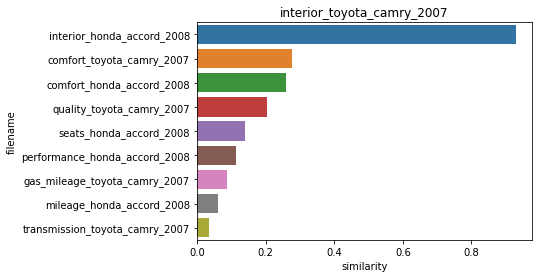

In [31]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외
print('type:', type(similarity_pair))
sorted_index = similarity_pair.argsort()[:, ::-1] # ::-1 의 의미는 인덱스 거꾸로 정렬. (기존 오름차순이면 내림차순, 내림차순이면 오름차순으로 정렬됨)
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)